# MC866 Project 1

## PART I - Clustering Methods

### K-Means
API based on sklearn implementation of K-Means

In [169]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math

In [170]:
class KMeans:
    def __init__(self, X, n_clusters=5, random_state=None):
        self.n_clusters = n_clusters
        self.X = X
        self.rand = np.random.RandomState(random_state)
        self.centroids = []

    def init_centroids(self):
        self.centroids = self.rand.permutation(self.X)[:self.n_clusters]

    # returns an array of what cluster each point of the dataset belongs to
    def clusters(self): 
        distances = np.array([])
        for c in self.centroids:
            def euclidian_distance(x): 
                sum = np.sum(np.apply_along_axis(lambda p: np.power(p[0] - p[1], 2), 1, np.column_stack((x, c)))) # sum of the square of the difference of each feature to the corresponding centroid feature
                return np.sqrt(sum) # sqrt the root to find the euclidian distance
            d = np.apply_along_axis(euclidian_distance, 1, self.X)
            distances = np.append(distances, d)
        distances = distances.reshape((self.n_clusters,len(self.X)))
        distances = distances.T # list of distances of each centroid to the element in the given index (equivalent to zip(*distances) but faster)
        return np.apply_along_axis(np.argmin, 1, distances) # the index of which centroid each data point belongs to

    def fit(self):
        while True:
            clusters = self.clusters()
            changed = False
            for i in range(0, len(self.centroids)):
                data_filter = clusters == i
                filtered_data = self.X[data_filter] # only data that belongs to the cluster
                avg = np.sum(filtered_data, axis=0)
                avg = np.apply_along_axis(lambda x: x/filtered_data.shape[0], 0, avg)
                
                for j in range (0, avg.shape[0]):
                    if self.centroids[i][j] != avg[j]:
                        changed = True
                        self.centroids[i][j] = avg[j]
            if not changed:
                break


            



In [171]:
df = pd.read_csv("./data/cluster.dat", sep=' ', header=None)
df.head()

,0,1
0,1555.0,28.65
1,1490.0,27.55
2,1445.0,28.35
3,1415.0,28.80
4,1375.0,28.05


In [172]:
k = KMeans(X=df.to_numpy(),n_clusters=3)

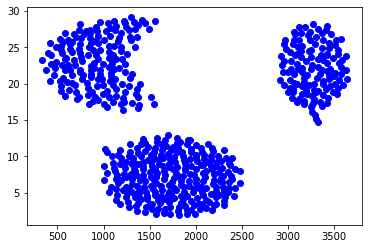

In [173]:
# 2D dataset

fig, ax = plt.subplots()
ax.scatter(df.iloc[:,:1].values,df.iloc[:,1:].values, c="blue") # the data
plt.show()

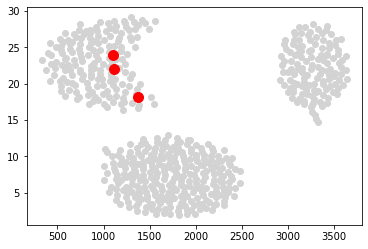

In [174]:
# initialize centroids and show their initial position in the chart
k.init_centroids()

fig, ax = plt.subplots()
ax.scatter(df.iloc[:,:1].values,df.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(k.centroids[:,:1],k.centroids[:,1:], c="red", s=100) # the data
plt.show()

In [175]:
k.clusters()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 2, 2, 2, 1, 1,
       1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

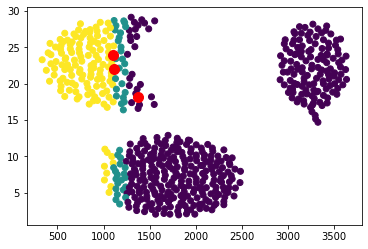

In [176]:
# Result of clusters before any fitting is done

c = k.clusters()

fig, ax = plt.subplots()
ax.scatter(df.iloc[:,:1].values,df.iloc[:,1:].values, c=c) # the data
ax.scatter(k.centroids[:,:1],k.centroids[:,1:], c="red", s=100) # the data
plt.show()

In [177]:
k.fit()

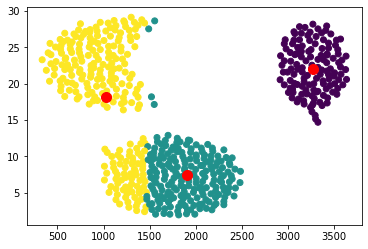

In [178]:
# Result of clusters after fitting is done

c = k.clusters()

fig, ax = plt.subplots()
ax.scatter(df.iloc[:,:1].values,df.iloc[:,1:].values, c=c) # the data
ax.scatter(k.centroids[:,:1],k.centroids[:,1:], c="red", s=100) # the data
plt.show()